- What is a neural network? What are the general steps required to build a neural network? 

Neural Networks form the base of deep learning which is a subfield of machine learning where the algorithms are inspired by the structure of the human brain. Neural Networks take in the data and train themselves to recognize the patterns in this data and then predict the outputs for a new set of similar data. 
In General there are 4 steps:
Step 1: Start with random weights and bias vectors
Step 2: Perform prediction
Step 3: Compared prediction results to desired output 
Step 4: Adjust the weight and bias vectors to predict more accurately next time and go to Step 2.

- Generally, how do you check the performance of a neural network? Why? 

- Create a neural network using keras to predict the outcome of either of these datasets: 

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone



In [362]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
import tensorflow as tf

# convert the data to dataframe
df_abalone = pd.read_csv('abalone.data',header = None)
df_abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [363]:
#rename columns
df_abalone = df_abalone.rename(columns = {df_abalone.columns[0]: 'Sex',df_abalone.columns[1]: 'Length',df_abalone.columns[2]: 'Diameter',df_abalone.columns[3]: 'Height',df_abalone.columns[4]: 'Whole weight',df_abalone.columns[5]: 'Shucked weight',df_abalone.columns[6]: 'Viscera weight',df_abalone.columns[7]: 'Shell weight',df_abalone.columns[8]: 'Rings'})  # Apply rename function
print(df_abalone) 

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [364]:
df_abalone.info()# checking the values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [365]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [366]:
df_abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [367]:
def gender_to_numeric(x):# convert the sex_num to numeric
    if x=='F': return 2
    if x=='M': return 1
    if x=='I': return 3

df_abalone['Sex_num'] = df_abalone['Sex'].apply(gender_to_numeric)
df_abalone = df_abalone.drop('Sex',axis=1)
df_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,3
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


 as we can see df_abalone has so many outliers for that kind of data we have to use Mean_absolute_error.Because 
 Regression problems, especially when the distribution of the target variable has outliers, such as small or big values that are a great distance from the mean value. It is considered to be more robust to outliers.

<AxesSubplot:>

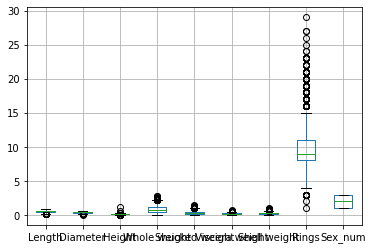

In [226]:
df_abalone.boxplot()

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_abalone.drop(['Rings','Sex_num','Length','Height'],axis=1).values# Features
y = df_abalone['Rings'].values# Target

# split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# find the number of predictors 
col_n = X_train.shape[1]
col_n

5

In [398]:
from keras.callbacks import EarlyStopping, History

# set up the model:model
model = Sequential()

# Add the first layer
model.add(Dense(100,activation='relu',input_shape=(col_n,)))
model.add(Dense(100,activation='relu'))
#Add the second layer
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
#Add the output layer 
model.add(Dense(1))


# Define early _stopping_monitor
early_stopping_monitor = EarlyStopping(monitor='loss',patience=2)

# to retrieve the history
history = History()

#compile the model
model.compile(optimizer='adam',loss='mean_absolute_error')
model.fit(X_train,y_train,epochs=500,callbacks=[early_stopping_monitor, history])


Epoch 1/500
92/92 [==============================] - 1s 2ms/step - loss: 5.0354
Epoch 2/500
92/92 [==============================] - 0s 2ms/step - loss: 1.7810
Epoch 3/500
92/92 [==============================] - 0s 2ms/step - loss: 1.6284
Epoch 4/500
92/92 [==============================] - 0s 2ms/step - loss: 1.5763
Epoch 5/500
92/92 [==============================] - ETA: 0s - loss: 1.552 - 0s 2ms/step - loss: 1.5421
Epoch 6/500
92/92 [==============================] - 0s 2ms/step - loss: 1.5253
Epoch 7/500
92/92 [==============================] - 0s 2ms/step - loss: 1.5291
Epoch 8/500
92/92 [==============================] - 0s 2ms/step - loss: 1.5352


In [399]:
print(history.history.keys())

dict_keys(['loss'])


In [406]:
# Use model to predict new data (our testing data)
y_pred = model.predict(X_test)
# View age predictions
print(y_pred)
# Evaluate results
model.evaluate(X_test,y_test)

[[12.443041 ]
 [ 9.404136 ]
 [15.139422 ]
 ...
 [ 7.8351617]
 [11.59607  ]
 [ 8.341568 ]]
40/40 [==============================] - 0s 1ms/step - loss: 1.4889


1.488922119140625

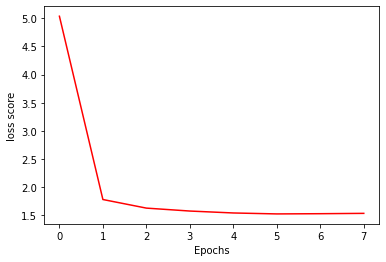

In [407]:
from matplotlib import pyplot as plt
#create the plot 
plt.plot(history.history['loss'],'r')
plt.xlabel('Epochs')
plt.ylabel('loss score')
plt.show()

- Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


In [416]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
df_abalone


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,3
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [417]:
X = df_abalone.drop(['Rings','Sex_num','Length','Height'],axis=1).values# Features
y = df_abalone['Rings'].values# Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [418]:
KNR = KNeighborsRegressor(n_neighbors=20)
KNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [419]:
y_pred = KNR.predict(X_test)
print(y_pred)

[11.1   9.65 14.45 ...  8.65 11.65  9.35]


In [421]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('R2 score for KNN',r2_score(y_pred,y_test))
print('Root Mean Square error KNN',mean_squared_error(y_pred,y_test))
print('Mean absolute error',mean_absolute_error(y_pred,y_test))

R2 score for KNN 0.09165216781785535
Root Mean Square error KNN 4.70655701754386
Mean absolute error 1.5451754385964913


- Create a neural network using pytorch to predict the same result as question 3. 

In [466]:
import torch
from torch import nn,optim
import torch.nn.functional as F # where the activation function are.
import matplotlib.pyplot as plt
import torch.nn as nn

X = df_abalone.drop(['Rings','Sex_num','Length','Height'],axis=1).values
y = df_abalone['Rings'].values

# split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [467]:
# create tensors = matrices
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test) 

y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
# Convert the incoming data to float type

In [468]:
# artificial neural network
class ANN_Model(nn.Module):
    def __init__(self,input_features=5,hidden1=100,hidden2=100,out_features=1):
        super().__init__()# super is a computed indirect reference .So it isolates changes
        # and makes sure that children in the layers of multiple inheritence are calling the right parents
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
       # apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [469]:
torch.manual_seed(42)
# create instance of model
ann = Model()

In [470]:
#loss function
loss_function = nn.L1Loss()
#optimizer
optimizer = torch.optim.Adam(ann.parameters(),lr=0.01)

In [471]:
# run  model through multiple epochs/iterations
final_loss = []
n_epochs = 300
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number:{epoch} with loss:{loss}')
        
    optimizer.zero_grad()# zero the gradient before running backwards propagation
    loss.backward()
    optimizer.step()# perform one optimization step each epoch


c:\users\12674\miniconda3\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([2923])) that is different to the input size (torch.Size([2923, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch number:1 with loss:9.774601936340332
Epoch number:11 with loss:3.9206697940826416
Epoch number:21 with loss:2.563875675201416
Epoch number:31 with loss:2.4362239837646484
Epoch number:41 with loss:2.4268879890441895
Epoch number:51 with loss:2.376356840133667
Epoch number:61 with loss:2.3730978965759277
Epoch number:71 with loss:2.3683338165283203
Epoch number:81 with loss:2.367408275604248
Epoch number:91 with loss:2.3665926456451416
Epoch number:101 with loss:2.3660337924957275
Epoch number:111 with loss:2.3657784461975098
Epoch number:121 with loss:2.3655850887298584
Epoch number:131 with loss:2.3654110431671143
Epoch number:141 with loss:2.365257501602173
Epoch number:151 with loss:2.3651092052459717
Epoch number:161 with loss:2.3649795055389404
Epoch number:171 with loss:2.3648629188537598
Epoch number:181 with loss:2.364753246307373
Epoch number:191 with loss:2.3656439781188965
Epoch number:201 with loss:2.367799758911133
Epoch number:211 with loss:2.366344690322876
Epoch n

In [472]:
#predictions
y_pred = []

with torch.no_grad():# decrease memory consumption
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())# return index with max element in each prediction set 
    

In [473]:
print('Mean absolute error',mean_absolute_error(y_test,y_pred))

Mean absolute error 9.81658692185008


- Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

For my regression analysis I was able to get better performance from Keras model- its mean_absolute_error (MAE) was 1.488922119140625 while KNR's mean_absolute_error was 1.5451754385964913 which is higher. Pytorch's MAE was the highest at 9.81658692185008. 

I think the reason why Keras's performance was better is due to the fact that dataset is small - it has only 9 columns and 4177 rows. I learned that Keras is best when working with small datasets, rapid prototyping, and multiple back-end support. Pytorch is targeted to work with large datasets - that is why with this small dataset pytorch performance was worse - due to small size pytorch usage is resulting in overfitting which is demonstrated by training dataset performance being better than test dataset performance.



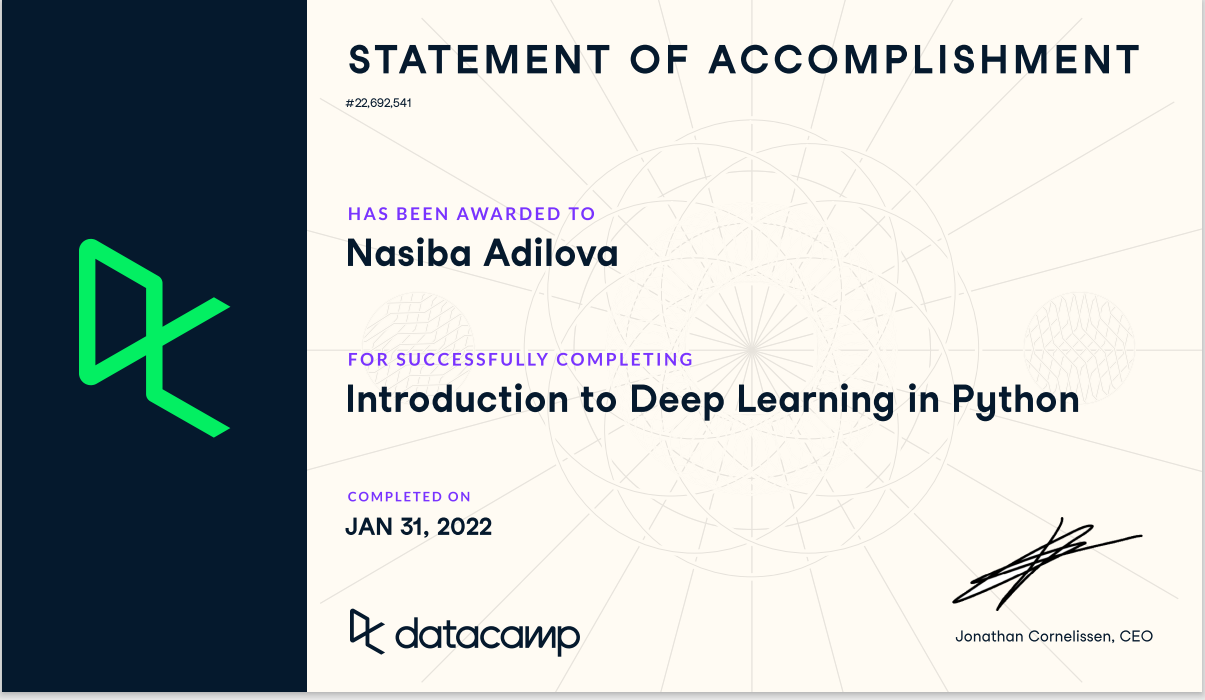